In [43]:
import google.datalab.bigquery as bq
import seaborn as sns
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt

In [70]:
# change these to try this notebook out
BUCKET = 'sarah-bucket'
PROJECT = 'qwiklabs-gcp-aebfb78fe0f1b1d1'
REGION = 'us-west1-a'

import os
os.environ['BUCKET'] = BUCKET
os.environ['PROJECT'] = PROJECT
os.environ['REGION'] = REGION

In [71]:
%%bash
if ! gsutil ls | grep -q gs://${BUCKET}/; then
  gsutil mb -l ${REGION} gs://${BUCKET}
fi

In [88]:
! gsutil ls

gs://atos-asl/
gs://qwiklabs-gcp-aebf/
gs://qwiklabs-gcp-aebfb78fe0f1b1d1/
gs://sarah-bucket/
gs://sasibucket-1/


In [83]:
query = """
  Select DISTINCT prediction_date, wind_speed_100m, 
  wind_direction_100m, 
  temperature, 
  air_density,
  pressure, precipitation, wind_gust, radiation, 
  wind_speed, wind_direction, MP.price

  FROM (Select DISTINCT prediction_date, 
  AVG(wind_speed_100m) as wind_speed_100m, 
  AVG(wind_direction_100m) as wind_direction_100m, 
  AVG(temperature) as temperature, 
  AVG(air_density) as air_density,
  AVG(pressure) as pressure, 
  AVG(precipitation) as precipitation, 
  AVG(wind_gust) as wind_gust, 
  AVG(radiation) as radiation, 
  AVG(wind_speed) as wind_speed, 
  AVG(wind_direction) as wind_direction
  FROM energy.historical_forecasting as HF
  WHERE prediction_date  > '2015-01-01 12:00:00 UTC' AND prediction_date  < '2015-10-19 11:00:00 UTC'
  GROUP BY prediction_date
  ORDER BY prediction_date) HF
  
  LEFT JOIN energy.market_price as MP
    on HF.prediction_date = MP. date
"""

In [84]:
# Call BigQuery and examine in dataframe# Call  
df = bq.Query(query).execute().result().to_dataframe()
df.head()

,prediction_date,wind_speed_100m,wind_direction_100m,temperature,air_density,pressure,precipitation,wind_gust,radiation,wind_speed,wind_direction,price
0,2015-07-07 03:00:00,3.438889,229.255556,16.527778,1.125,934.261111,0.0,2.900000,0.000000,1.994444,213.111111,56.90
1,2015-05-10 20:00:00,4.561111,191.750000,17.116667,1.125,937.405556,0.0,4.016667,214.361111,2.727778,191.050000,56.55
2,2015-05-05 18:00:00,5.422222,244.583333,15.300000,1.125,931.677778,0.0,5.316667,487.611111,4.038889,243.655556,54.74
3,2015-08-24 01:00:00,7.783333,259.105556,14.822222,1.125,929.433333,0.0,8.883333,0.000000,4.644444,254.205556,30.00
4,2015-08-01 23:00:00,4.650000,138.405556,15.683333,1.125,932.883333,0.0,4.150000,0.000000,2.855556,136.250000,46.86


In [85]:
df.describe()

,wind_speed_100m,wind_direction_100m,temperature,air_density,pressure,precipitation,wind_gust,radiation,wind_speed,wind_direction,price
count,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000,6646.000000
mean,4.799901,189.582975,14.920355,1.132338,935.286695,0.117364,4.872509,225.250182,3.220986,189.082629,50.153506
std,1.964154,58.126639,9.626527,0.039333,6.105083,0.245561,2.428587,266.299815,1.319704,56.712796,12.448392
min,1.372222,47.883333,-6.044444,1.036111,913.800000,0.000000,1.194444,0.000000,0.855556,50.538889,4.000000
25%,3.534722,142.598611,7.540278,1.106111,932.034722,0.000000,3.284722,0.000000,2.294444,143.750000,43.000000
50%,4.477778,191.908333,14.213889,1.131667,934.761111,0.000000,4.327778,95.000000,2.961111,191.208333,50.890000
75%,5.544444,232.043056,21.062500,1.160556,937.805556,0.100000,5.627778,416.422222,3.850000,230.865278,59.950000
max,15.044444,329.544444,41.044444,1.229444,961.238889,1.700000,16.705556,954.288889,9.738889,327.711111,85.050000


/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


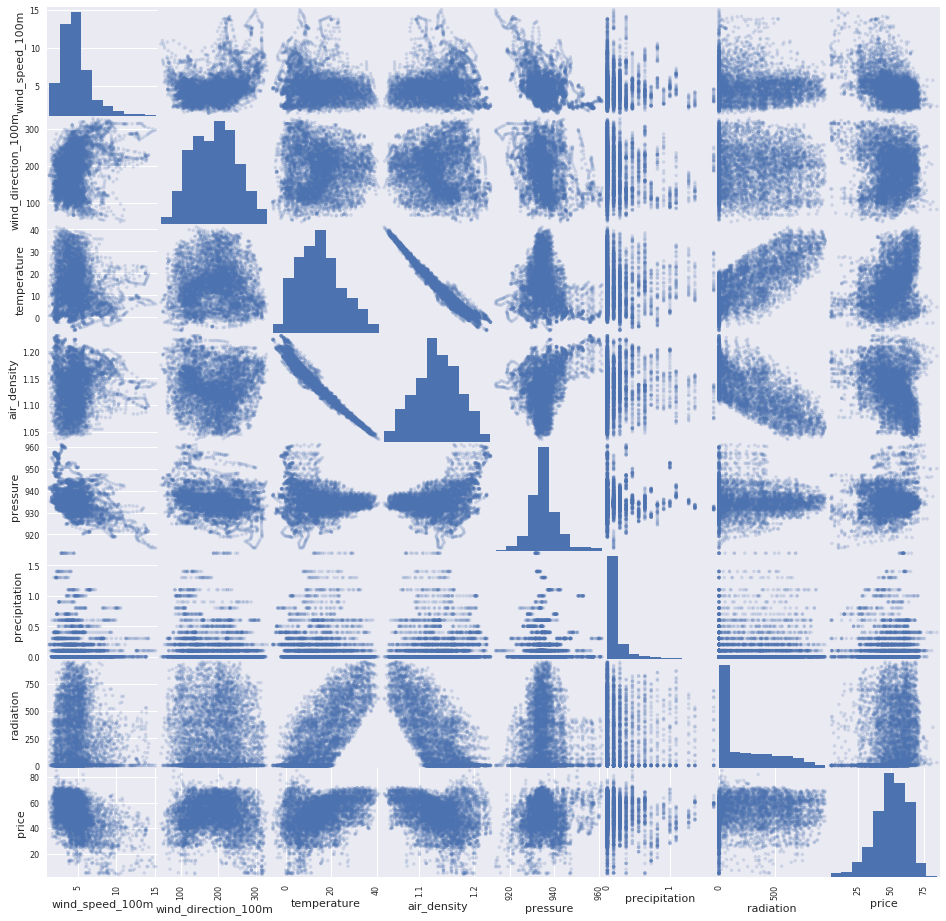

In [86]:
spm = pd.tools.plotting.scatter_matrix(df[["wind_speed_100m","wind_direction_100m","temperature",
                                          "air_density","pressure","precipitation", 
                                          "radiation", "price"]], alpha=0.2, figsize=(16, 16), diagonal='hist')

##
##  wind_speed_100m, wind_gust, wind_speed ~~ are all colinear
##  wind_direction, & wind_direction_100m ~~ are all colinear

In [87]:
sns.boxplot(x="lat", y="price", data=df, palette="Set1")

ValueError: Could not interpret input 'lat'

In [ ]:
sns.boxplot(x="long", y="price", data=df, palette="Set1")

In [ ]:
sns.boxplot(x="point", y="price", data=df, palette="Set1")

In [ ]:
sns.boxplot(x="precipitation", y="price", data=df, palette="Set1")

In [ ]:
df.hist("price")

In [ ]:
plt.figure(); 
plt.plot(x=df[["prediction_date"]],y=df[["price"]]); 
plt.legend(loc='best')

query="""
SELECT
  departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrival_delay, 10) AS arrival_delay_deciles
FROM
  `bigquery-samples.airline_ontime_data.flights`
GROUP BY
  departure_delay
ORDER BY
  departure_delay ASC
"""

import google.datalab.bigquery as bq
df = bq.Query(query).execute().result().to_dataframe()
df.head()

percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles = percentiles.rename(columns = lambda x : str(x*10) + "%")
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

without_extremes = df.drop(['0%', '100%'], 1)
without_extremes.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));

Select DISTINCT prediction_date, wind_speed_100m, wind_direction_100m, temperature, air_density,
pressure, precipitation, wind_gust, radiation, wind_speed, wind_direction, price, HF.point, lat, long
FROM energy.historical_forecasting as HF
LEFT JOIN energy.market_price as MP
  on HF.prediction_date = MP. date
LEFT JOIN energy.station_location as SL
  on HF.point = SL.point
WHERE prediction_date > '2015-01-01 00:00:00 UTC' AND prediction_date < '2015-10-19 11:00:00 UTC'
ORDER BY prediction_date

## HF max 2015-10-19 11:00:00 UTC min 2014-01-01 12:00:00 UTC
## MP max 2016-02-02 23:00:00 UTC min 2015-01-01 00:00:00 UTC
## 2015-01-01 00:00:00 UTC  TO  2015-10-19 11:00:00 UTC

In [89]:
df.to_csv('./Sarah/sarah_data.csv', index=False, header=False)

In [91]:
%bash
gsutil ls
wc -l *.csv
head *.csv
tail *.csv

gs://atos-asl/
gs://qwiklabs-gcp-aebf/
gs://qwiklabs-gcp-aebfb78fe0f1b1d1/
gs://sarah-bucket/
gs://sasibucket-1/
6646 sarah_data.csv
2015-07-07 03:00:00,3.4388888888888887,229.25555555555553,16.52777777777778,1.125,934.2611111111113,0.0,2.9,0.0,1.9944444444444442,213.11111111111111,56.9
2015-05-10 20:00:00,4.561111111111112,191.75,17.11666666666667,1.125,937.4055555555556,0.0,4.0166666666666675,214.36111111111111,2.7277777777777783,191.04999999999998,56.55
2015-05-05 18:00:00,5.422222222222222,244.58333333333334,15.3,1.125,931.6777777777778,0.0,5.316666666666667,487.61111111111114,4.038888888888889,243.65555555555557,54.74
2015-08-24 01:00:00,7.783333333333333,259.10555555555555,14.822222222222223,1.125,929.4333333333334,0.0,8.883333333333333,0.0,4.644444444444444,254.20555555555558,30.0
2015-08-01 23:00:00,4.6499999999999995,138.40555555555557,15.683333333333332,1.125,932.8833333333334,0.0,4.1499999999999995,0.0,2.855555555555555,136.25,46.86
2015-04-03 09:00:00,2.733333333333334,109.

In [ ]:
%bash
DATADIR=$(pwd)/data/DNN
OUTDIR=$(pwd)/trained/DNN
rm -rf $OUTDIR
gcloud ml-engine local train \
   --module-name=DNN.task \
   --package-path=${PWD}/DNN \
   -- \
   --train_data_path="${DATADIR}/sarah_data.csv" \
   --output_dir=${OUTDIR} \
   --model=lstm --train_steps=10 --sequence_length=$SEQ_LEN

In [ ]:
def train_and_evaluate(output_dir):
  EVAL_INTERVAL = 50
  run_config = tf.estimator.RunConfig(save_checkpoints_secs = EVAL_INTERVAL,
                                      keep_checkpoint_max = 3)
  estimator = tf.estimator.DNNRegressor(
                       model_dir = output_dir,
                       feature_columns = get_cols(),
                       hidden_units = [64, 32],
                       config = run_config)
  train_spec = tf.estimator.TrainSpec(
                       input_fn = read_dataset('train.csv', mode = tf.estimator.ModeKeys.TRAIN),
                       max_steps = TRAIN_STEPS)
  exporter = tf.estimator.LatestExporter('exporter', serving_input_fn)
  eval_spec = tf.estimator.EvalSpec(
                       input_fn = read_dataset('eval.csv', mode = tf.estimator.ModeKeys.EVAL),
                       steps = None,
                       start_delay_secs = 30, # start evaluating after N seconds
                       throttle_secs = EVAL_INTERVAL,  # evaluate every N seconds
                       exporters = exporter)
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [ ]:
# Run the model
shutil.rmtree('dnn_trained', ignore_errors = True) # start fresh each time
train_and_evaluate('dnn_trained')